<a href="https://colab.research.google.com/github/AgustinBiasca/Linear-Regression/blob/main/advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!pip install ISLP

In [6]:
from matplotlib.pyplot import subplots
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import(ModelSpec as MS,
                 summarize,
                 poly)

In [7]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
allvars = df.columns.drop(['sales', 'Unnamed: 0'])

X = MS(allvars).fit_transform(df)
y= df['sales']

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.9389,0.312,9.422,0.00
TV,0.0458,0.001,32.809,0.00
radio,0.1885,0.009,21.893,0.00
newspaper,-0.0010,0.006,-0.177,0.86


In [9]:
print(f'The r squeard is: {results.rsquared}')
print(f'The RSE is: {results.scale}')

The r squeard is: 0.8972106381789522
The RSE is: 2.8409452188887094


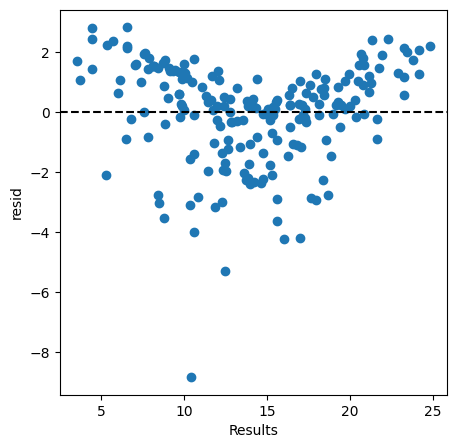

In [10]:
#plot

ax = subplots(figsize=(5, 5)) [1]

ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Results')
ax.set_ylabel('resid')
ax.axhline(0, c='k', ls='--')
plt.show()

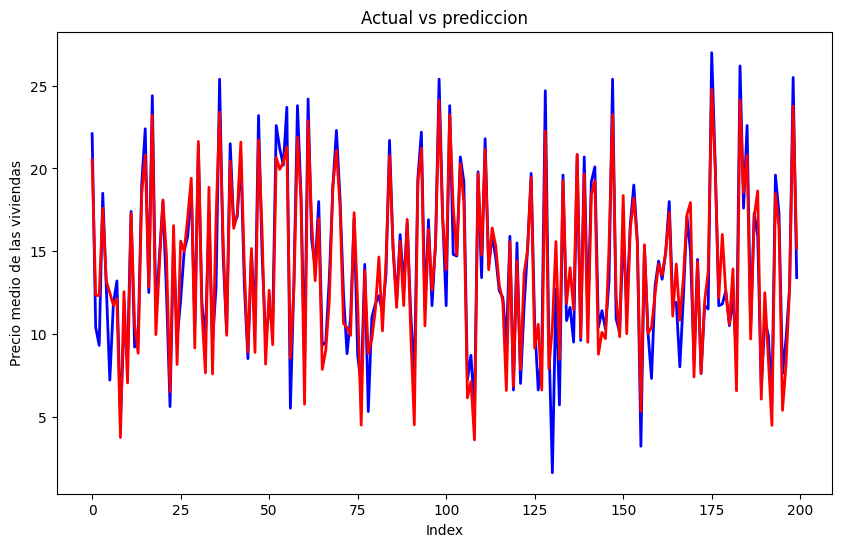

In [11]:
fig= plt.figure(figsize=(10,6))

plt.plot(y, color='blue',linewidth=2, linestyle='-')

plt.plot(results.predict(), color='red', linewidth=2, linestyle='-')

plt.title('Actual vs prediccion')
plt.xlabel('Index')
plt.ylabel('Precio medio de las viviendas')
plt.show()

The model is very efficient, it relates the variables very well, this is shown by the R-squared. We see that the relationship is very linear and it would not be necessary to add a log, squared term or a root.

On the other hand, I suppose that this model has room for improvement, especially because of the fact that newspapers have a high p-value, which indicates that there is no statistical relationship between newspaper advertising and sales.

Let's eliminate this variable and see how it affects our model.

In [12]:
newallvars = df.columns.drop(['sales', 'Unnamed: 0', 'newspaper'])

X = MS(newallvars).fit_transform(df)
y= df['sales']

model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,2.9211,0.294,9.919,0.0
TV,0.0458,0.001,32.909,0.0
radio,0.1880,0.008,23.382,0.0


In [13]:
print(f'The r squeard is: {results.rsquared}')
print(f'The RSE is: {results.scale}')
print('----------------------------------------------------')

print(f'The r squeard is: {results2.rsquared}')
print(f'The RSE is: {results2.scale}')

The r squeard is: 0.8972106381789522
The RSE is: 2.8409452188887094
----------------------------------------------------
The r squeard is: 0.8971942610828956
The RSE is: 2.8269745181097377


There seems to be a slight improvement in our model but very small.

Pherhaps spending 50.000 usd on TV advertising and 50.000 usd on radio avertising is associated with higher sales than allocating 100.000 usd to either TV or radio individually. In marketing, this is know as a synergy effect, while in statistics it is called an interaction effect.

In this setting, let's create an interaction term between our two variables, and let's train this new model

In [14]:
X = MS(['TV',
        'radio',
        ('TV', 'radio')]).fit_transform(df) #Interaction term

model3= sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,6.7502,0.248000,27.233,0.000
TV,0.0191,0.002000,12.699,0.000
radio,0.0289,0.009000,3.241,0.001
TV:radio,0.0011,0.000052,20.727,0.000


In [15]:
print(f'The r squeard is: {results.rsquared}')
print(f'The RSE is: {results.scale}')
print('-----------------------------------------------------------')

print(f'The r squeard is: {results2.rsquared}')
print(f'The RSE is: {results2.scale}')

print('-------------------------------------------------------------')

print(f'The r squeard is: {results3.rsquared}')
print(f'The RSE is: {results3.scale}')

The r squeard is: 0.8972106381789522
The RSE is: 2.8409452188887094
-----------------------------------------------------------
The r squeard is: 0.8971942610828956
The RSE is: 2.8269745181097377
-------------------------------------------------------------
The r squeard is: 0.9677905498482523
The RSE is: 0.8902213399373836


The improvement in this case is remarkable, the model almost fully explains the relationship between sales and advertising budget in media such as TV and radio.

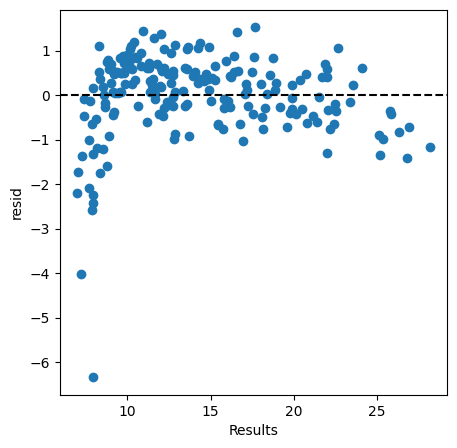

In [16]:
ax = subplots(figsize=(5, 5)) [1]

ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Results')
ax.set_ylabel('resid')
ax.axhline(0, c='k', ls='--')
plt.show()

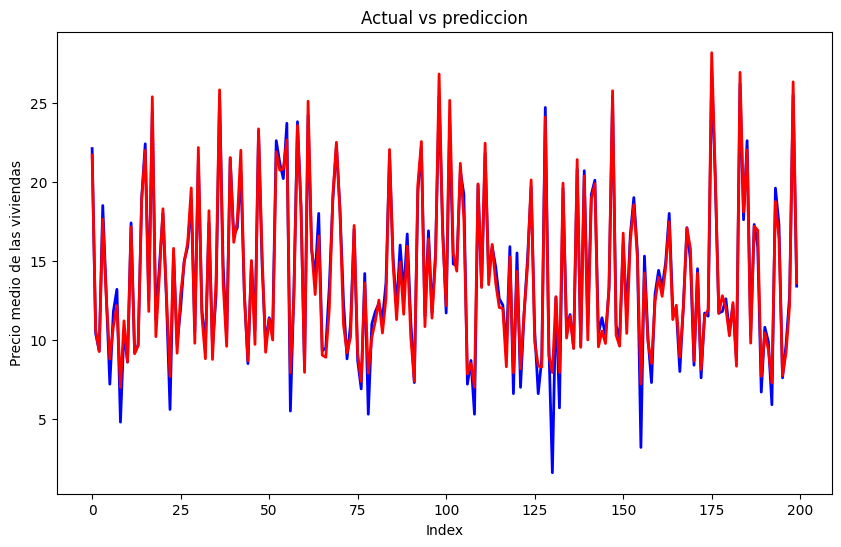

In [17]:
fig= plt.figure(figsize=(10,6))

plt.plot(y, color='blue',linewidth=2, linestyle='-')

plt.plot(results3.predict(), color='red', linewidth=2, linestyle='-')

plt.title('Actual vs prediccion')
plt.xlabel('Index')
plt.ylabel('Precio medio de las viviendas')
plt.show()

With this model, we can practically predict exactly how a one-off increase in the TV or Radio budget will affect sales.